In [243]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

# Data pre-processing & EDA

In [244]:
df = pd.read_csv('sbi_stocks.csv', index_col='Date', parse_dates=['Date'])
df.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-04-17,196.00,198.000000,186.300003,193.250000,184.945801,89851063
2020-04-20,194.00,197.350006,190.050003,192.500000,184.228027,81958510
2020-04-21,188.00,188.199997,183.000000,184.750000,176.811050,53042420
2020-04-22,185.50,189.500000,181.350006,188.699997,180.591324,61503413
2020-04-23,187.75,189.899994,185.149994,186.699997,178.677246,50955312
2020-04-24,184.00,184.000000,179.000000,179.750000,172.025909,65137305
2020-04-27,183.50,183.500000,180.500000,180.899994,173.126495,42996571
2020-04-28,182.00,185.350006,181.199997,184.300003,176.380386,49590230
2020-04-29,185.00,191.800003,183.500000,190.100006,181.931168,57470466


In [245]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-04-17,196.00,198.000000,186.300003,193.250000,184.945801,89851063
2020-04-20,194.00,197.350006,190.050003,192.500000,184.228027,81958510
2020-04-21,188.00,188.199997,183.000000,184.750000,176.811050,53042420
2020-04-22,185.50,189.500000,181.350006,188.699997,180.591324,61503413
2020-04-23,187.75,189.899994,185.149994,186.699997,178.677246,50955312


In [246]:
df['Previous Close'] = df['Close'].shift(1)

In [247]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Previous Close
Date,,,,,,,
2020-04-17,196.00,198.000000,186.300003,193.250000,184.945801,89851063,NaN
2020-04-20,194.00,197.350006,190.050003,192.500000,184.228027,81958510,193.250000
2020-04-21,188.00,188.199997,183.000000,184.750000,176.811050,53042420,192.500000
2020-04-22,185.50,189.500000,181.350006,188.699997,180.591324,61503413,184.750000
2020-04-23,187.75,189.899994,185.149994,186.699997,178.677246,50955312,188.699997


In [248]:
df = df.drop('2020-04-17')

In [249]:
df

,Open,High,Low,Close,Adj Close,Volume,Previous Close
Date,,,,,,,
2020-04-20,194.000000,197.350006,190.050003,192.500000,184.228027,81958510,193.250000
2020-04-21,188.000000,188.199997,183.000000,184.750000,176.811050,53042420,192.500000
2020-04-22,185.500000,189.500000,181.350006,188.699997,180.591324,61503413,184.750000
2020-04-23,187.750000,189.899994,185.149994,186.699997,178.677246,50955312,188.699997
2020-04-24,184.000000,184.000000,179.000000,179.750000,172.025909,65137305,186.699997
...,...,...,...,...,...,...,...
2024-04-09,768.450012,772.450012,761.099976,764.200012,764.200012,7465892,768.299988
2024-04-10,766.500000,780.700012,763.650024,779.049988,779.049988,14530669,764.200012
2024-04-12,777.250000,779.500000,764.799988,766.299988,766.299988,14408722,779.049988


In [250]:
df = df.sort_index()

In [251]:
df.isna().sum()

Open              0
High              0
Low               0
Close             0
Adj Close         0
Volume            0
Previous Close    0
dtype: int64

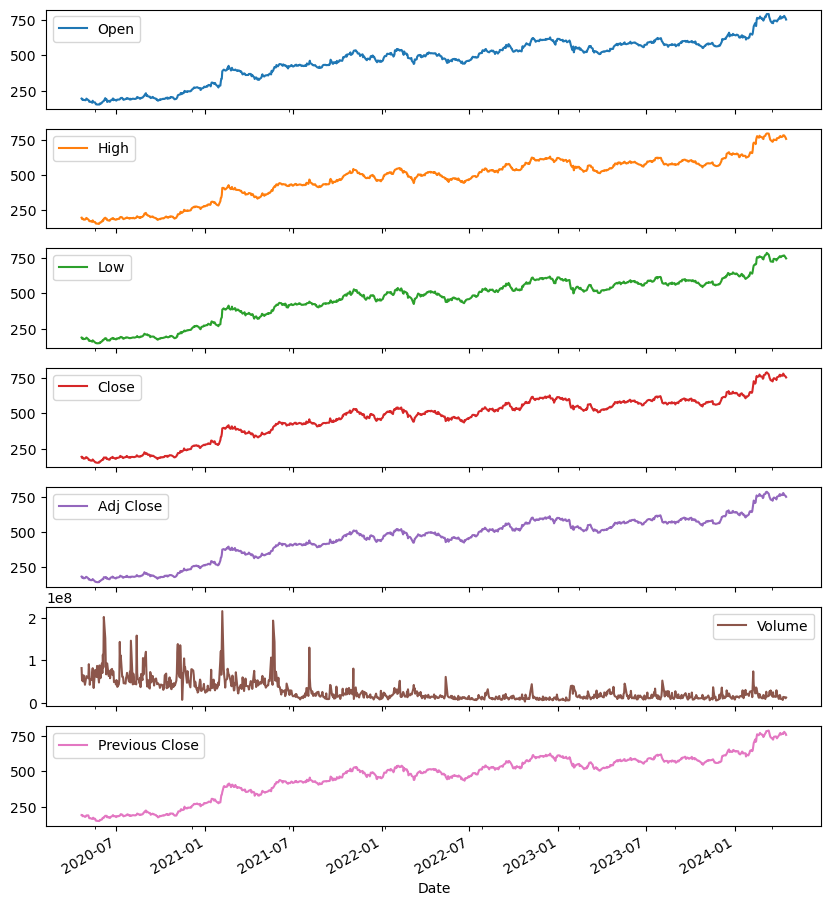

In [252]:
df.plot(subplots=True, figsize=(10,12))
plt.show()

In [253]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Previous Close'],
      dtype='object')

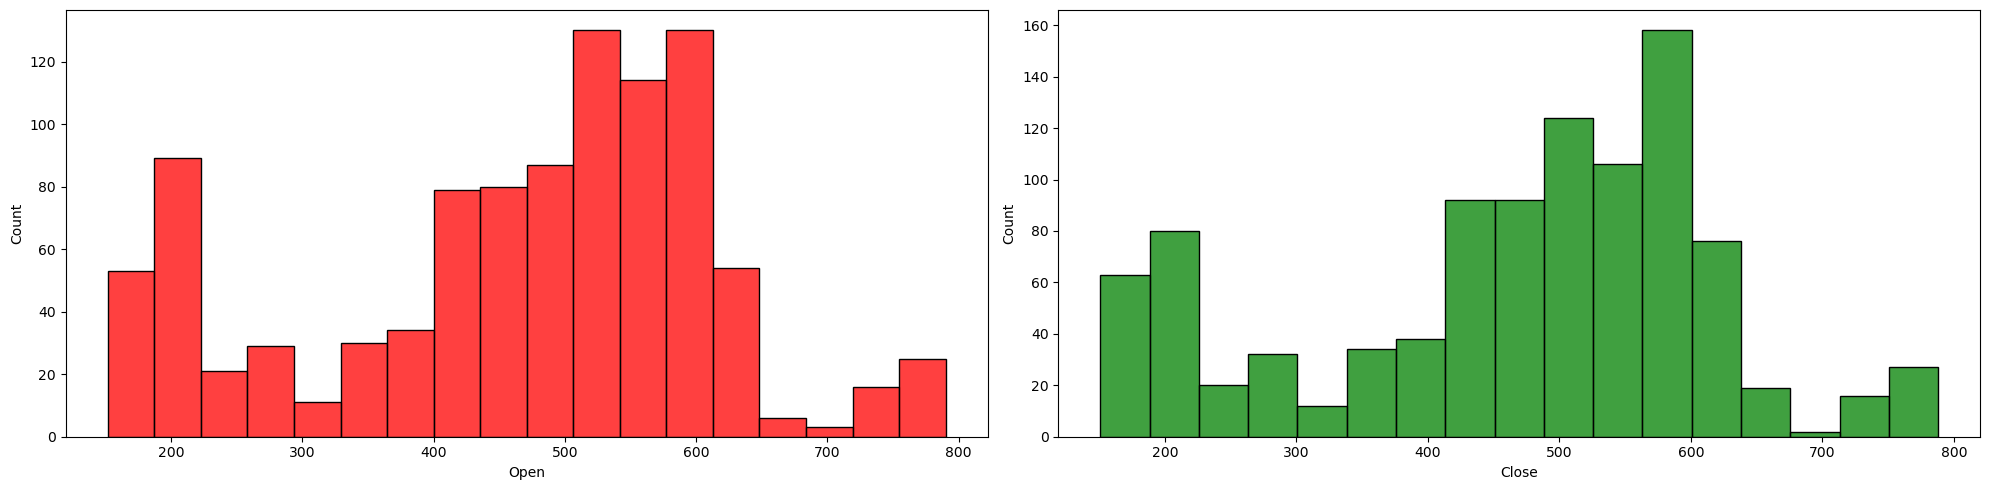

In [254]:
f= plt.figure(figsize=(20,5))
ax=f.add_subplot(121)
sns.histplot(df['Open'] , color ='red',ax=ax)

ax=f.add_subplot(122)
sns.histplot(df['Close'] , color ='green' , ax = ax)

plt.tight_layout()

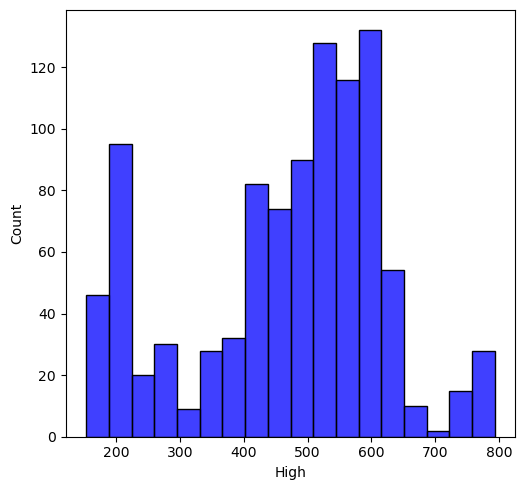

In [255]:
f= plt.figure(figsize=(10,5))
ax=f.add_subplot(122)
sns.histplot(df['High'] , color ='blue' , ax = ax)
plt.tight_layout()

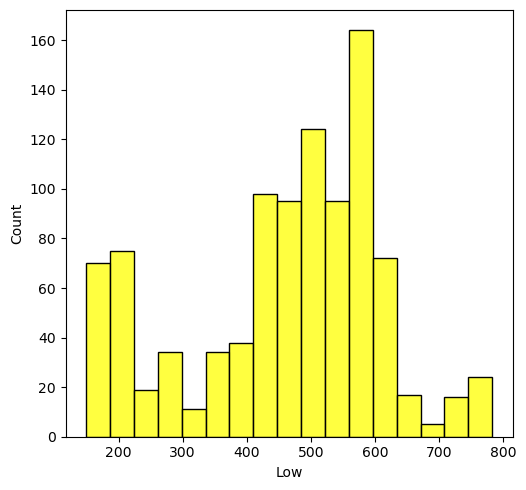

In [256]:
f= plt.figure(figsize=(10,5))
ax=f.add_subplot(122)
sns.histplot(df['Low'] , color ='yellow' , ax = ax)
plt.tight_layout()

In [257]:
df_copy = df.copy()

# Feature Engineering

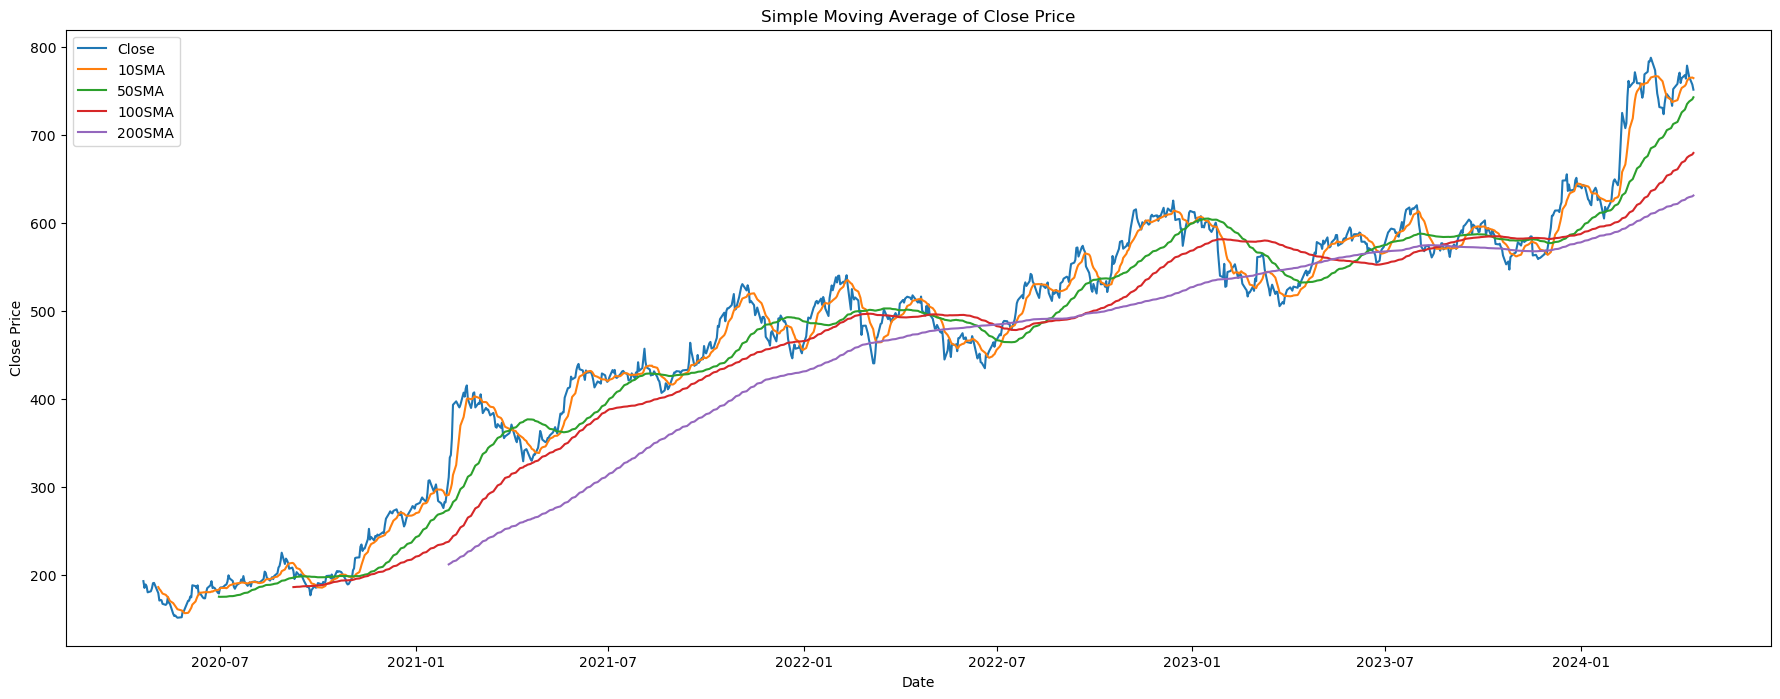

In [258]:
df_copy['Close 10Day MA'] = df_copy['Close'].rolling(window=10).mean()
df_copy['Close 50Day MA'] = df_copy['Close'].rolling(window=50).mean()
df_copy['Close 100Day MA'] = df_copy['Close'].rolling(window=100).mean()
df_copy['Close 200Day MA'] = df_copy['Close'].rolling(window=200).mean()

plt.figure(figsize=(22,8))
plt.plot(df_copy['Close'], label = 'Close')
plt.plot(df_copy['Close 10Day MA'], label = '10SMA')
plt.plot(df_copy['Close 50Day MA'], label = '50SMA')
plt.plot(df_copy['Close 100Day MA'], label = '100SMA')
plt.plot(df_copy['Close 200Day MA'], label = '200SMA')
plt.legend(loc='best')
plt.title("Simple Moving Average of Close Price")
plt.ylabel("Close Price")
plt.xlabel("Date")
plt.show()

It is observed that 10 Days Moving Average(DMA) fits best on the data detailing small variations, larger moving averages 100 and 200 gives better view of long term trend whereas smaller moving averages 10 and 50 give granular details for short term data.

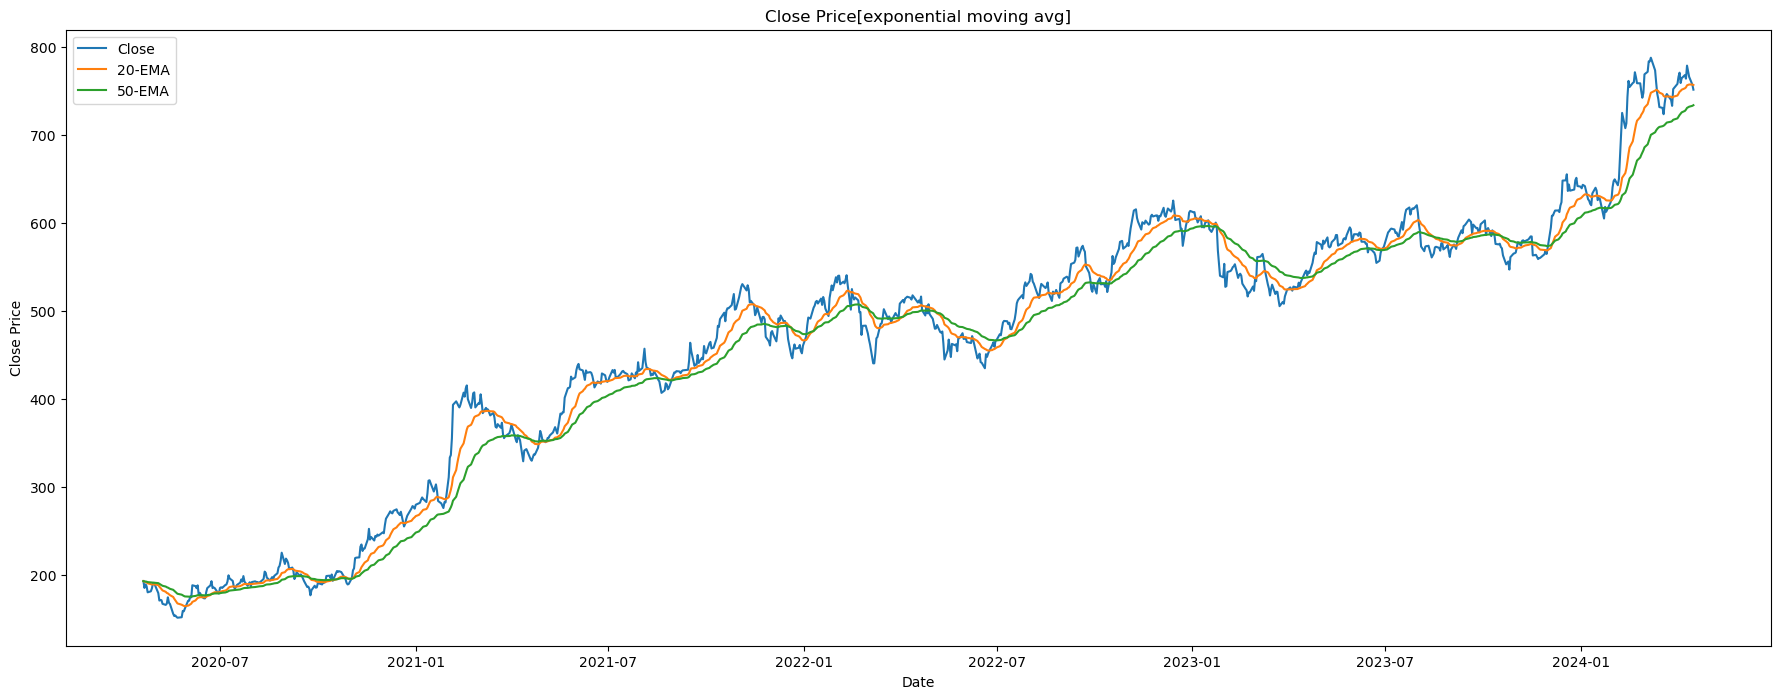

In [259]:
df_copy['Close 20-trday EMA'] = df_copy['Close'].ewm(span=20,adjust=False).mean()
df_copy['Close 50-trday EMA'] = df_copy['Close'].ewm(span=50,adjust=False).mean()
plt.figure(figsize=(22,8))
plt.plot(df_copy['Close'], label = 'Close')
plt.plot(df_copy['Close 20-trday EMA'], label = '20-EMA')
plt.plot(df_copy['Close 50-trday EMA'], label = '50-EMA')
plt.legend(loc='best')
plt.title("Close Price[exponential moving avg]")
plt.ylabel("Close Price")
plt.xlabel("Date")
plt.show()

auto-correlation analysis

In [260]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

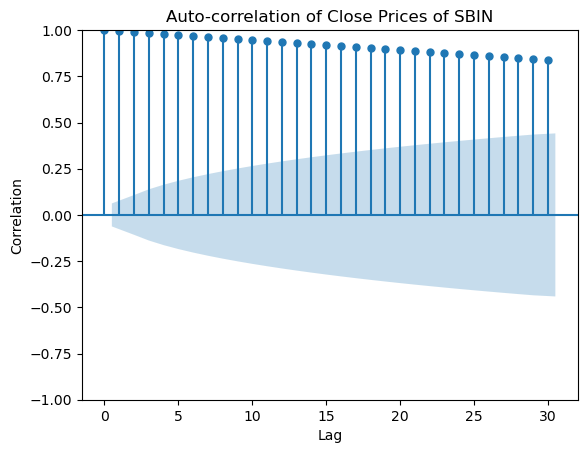

In [261]:
plot_acf(df['Close'])
plt.xlabel("Lag")
plt.ylabel("Correlation")
plt.title("Auto-correlation of Close Prices of SBIN")
plt.show()

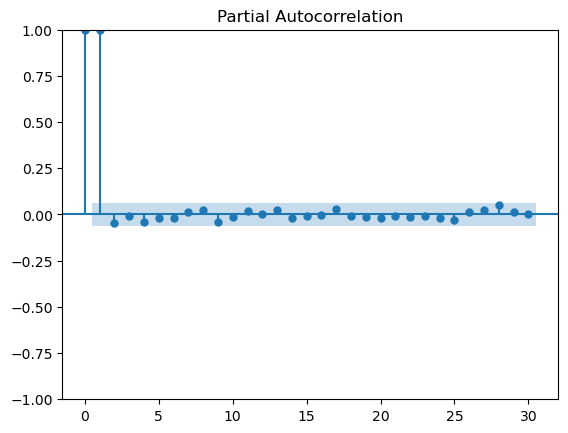

In [262]:
plot_pacf(df['Close'])
plt.show()

The partial autocorrelation is high for first two lags and quite low for rest of the lags.

As autcorrelation is highly significant than partial autocorrelation, we can infer that for stock prices, considering continuous data will result in beter predictions than data point at a single instance.

#Calculating daily returns and volitility

In [263]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Previous Close'],
      dtype='object')

In [264]:
df['Daily Return'] = ((df['Close']-df['Previous Close'])/df['Previous Close'])*100

In [265]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Previous Close,Daily Return
Date,,,,,,,,
2020-04-20,194.00,197.350006,190.050003,192.500000,184.228027,81958510,193.250000,-0.388098
2020-04-21,188.00,188.199997,183.000000,184.750000,176.811050,53042420,192.500000,-4.025974
2020-04-22,185.50,189.500000,181.350006,188.699997,180.591324,61503413,184.750000,2.138023
2020-04-23,187.75,189.899994,185.149994,186.699997,178.677246,50955312,188.699997,-1.059883
2020-04-24,184.00,184.000000,179.000000,179.750000,172.025909,65137305,186.699997,-3.722548


In [266]:
print(df['Daily Return'].describe())

count    991.000000
mean       0.154828
std        1.884446
min       -6.841358
25%       -0.860481
50%        0.142506
75%        1.106384
max       10.701211
Name: Daily Return, dtype: float64


In [267]:
print("99% quantile:",df['Daily Return'].quantile(0.99))
print("95% quantile:",df['Daily Return'].quantile(0.95))
print("90% quantile:",df['Daily Return'].quantile(0.90))
print("10% quantile:",df['Daily Return'].quantile(0.10))
print("5% quantile:",df['Daily Return'].quantile(0.5))
print("1% quantile:",df['Daily Return'].quantile(0.01))

99% quantile: 4.935602688751835
95% quantile: 3.2146498314978356
90% quantile: 2.4563318777292573
10% quantile: -1.9406246698769807
5% quantile: 0.14250582327089795
1% quantile: -4.738283627113159


In [268]:
df

,Open,High,Low,Close,Adj Close,Volume,Previous Close,Daily Return
Date,,,,,,,,
2020-04-20,194.000000,197.350006,190.050003,192.500000,184.228027,81958510,193.250000,-0.388098
2020-04-21,188.000000,188.199997,183.000000,184.750000,176.811050,53042420,192.500000,-4.025974
2020-04-22,185.500000,189.500000,181.350006,188.699997,180.591324,61503413,184.750000,2.138023
2020-04-23,187.750000,189.899994,185.149994,186.699997,178.677246,50955312,188.699997,-1.059883
2020-04-24,184.000000,184.000000,179.000000,179.750000,172.025909,65137305,186.699997,-3.722548
...,...,...,...,...,...,...,...,...
2024-04-09,768.450012,772.450012,761.099976,764.200012,764.200012,7465892,768.299988,-0.533643
2024-04-10,766.500000,780.700012,763.650024,779.049988,779.049988,14530669,764.200012,1.943205
2024-04-12,777.250000,779.500000,764.799988,766.299988,766.299988,14408722,779.049988,-1.636609


In [269]:
df.to_csv('sbi_dr.csv')


In [270]:
df.isna().sum()

Open              0
High              0
Low               0
Close             0
Adj Close         0
Volume            0
Previous Close    0
Daily Return      0
dtype: int64

# Visualization 

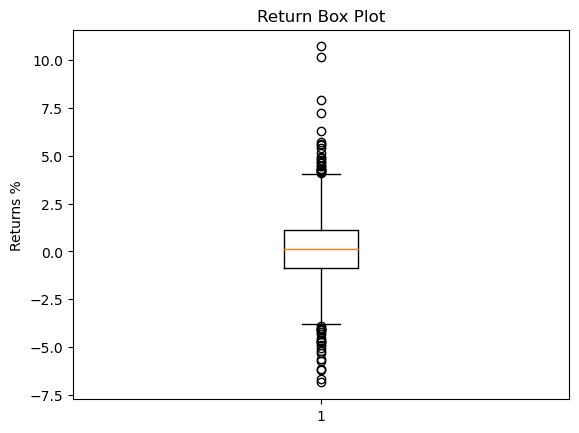

In [271]:
plt.boxplot(df['Daily Return'])
plt.title("Return Box Plot")
plt.ylabel("Returns %")
plt.show()

here we can see approx 99% of returns lie in the approximate range +/-5%, so this can be a good threshold to analyse the patterns near signifcantly higher and lower returns.

In [272]:
return_threshold = 5.0
df_copy['is_return_high'] = np.where(df['Daily Return']>return_threshold,1,0)
df_copy['is_return_low'] = np.where(df['Daily Return']<-return_threshold,1,0)
df_copy['is_return_high'] = np.where(df['Daily Return']>return_threshold,1,0)
df_copy['is_return_low'] = np.where(df['Daily Return']<-return_threshold,1,0)

In [273]:
print(df_copy['is_return_high'].sum())
print(df_copy['is_return_low'].sum())
print(df_copy['is_return_high'].sum())
print(df_copy['is_return_low'].sum())

10
9
10
9


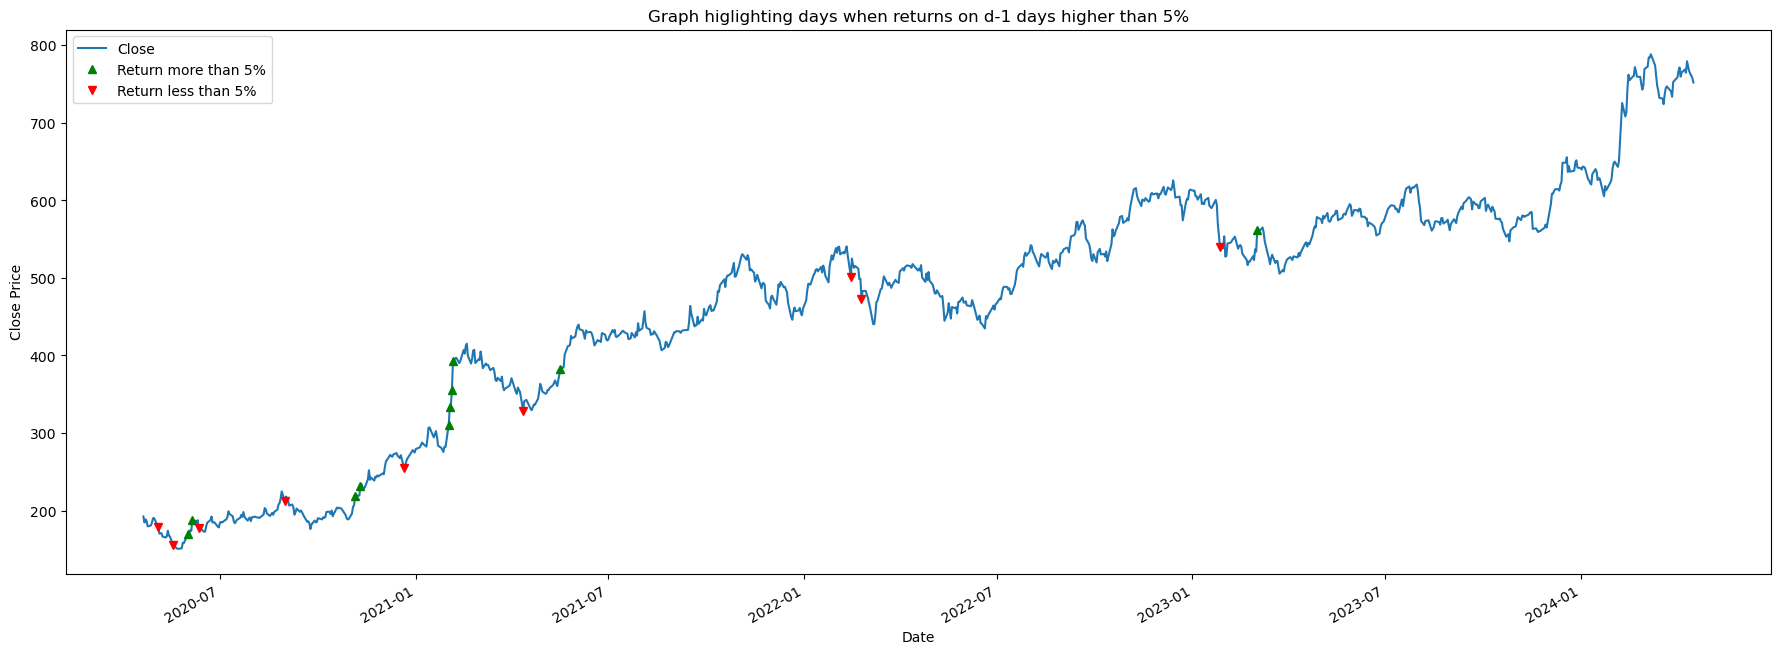

In [274]:
plt.figure(figsize=(22,8))
df['Close'].plot()
plt.plot(df_copy[df_copy['is_return_high'] == 1]['Close'],marker='^', color='g',linewidth=0,label="Return more than 5%")
plt.plot(df_copy[df_copy['is_return_low'] == 1]['Close'],marker='v', color='r',linewidth=0, label="Return less than 5%")
plt.ylabel("Close Price")
plt.title("Graph higlighting days when returns on d-1 days higher than 5%")
plt.legend()
plt.show()

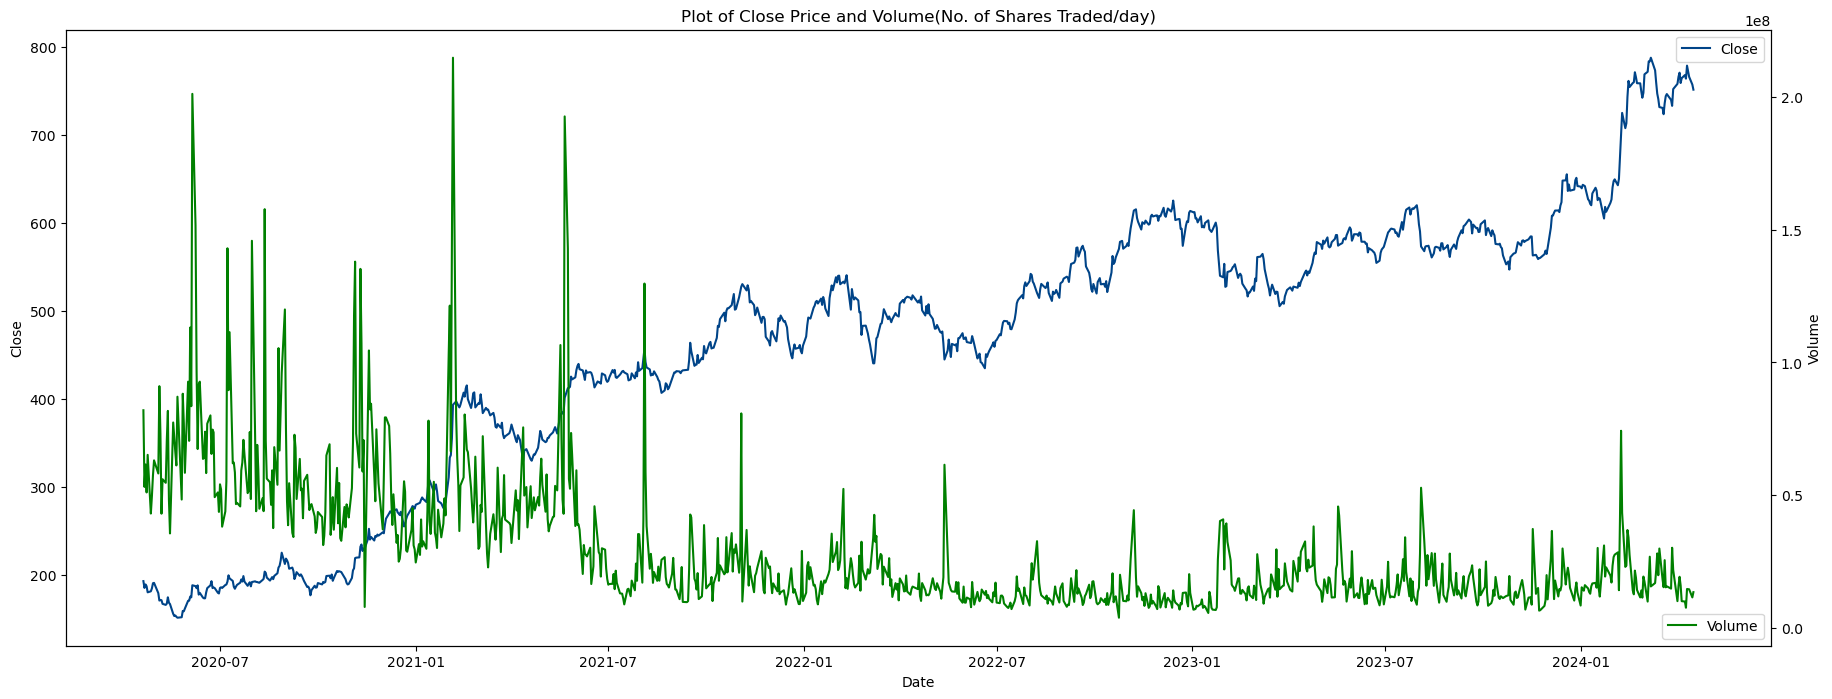

In [275]:
fig, ax1 = plt.subplots(figsize=(22,8))
ax2 = ax1.twinx()
sns.lineplot(x=df.index,y=df['Close']
         ,color='#004488'
         ,ax=ax1)
sns.lineplot(x=df.index,y=df['Volume'],
             color='g',
             ax=ax2)
ax1.legend(['Close'],loc=1)
ax2.legend(['Volume'],loc=4)
plt.title("Plot of Close Price and Volume(No. of Shares Traded/day)")
plt.show()

In [276]:
df.index.dtype

dtype('<M8[ns]')

#Volume analysis

In [277]:
def volume_analysis(df,cmp):
    plt.figure(figsize=(10,5))
    plt.plot(df.index,df['Volume'],c='midnightblue')
    plt.title('Volume Of Stock Traded for ' + cmp)
    plt.ylabel('Volume')
    plt.show()

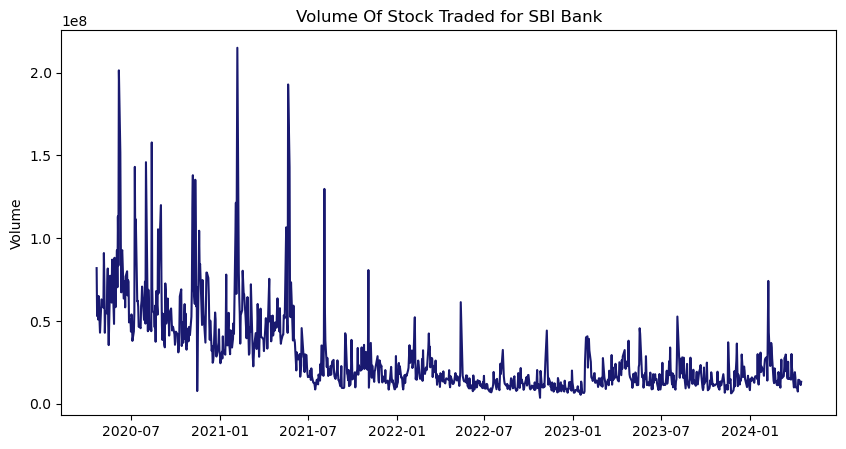

In [278]:
volume_analysis(df,'SBI Bank')

High trading volumes often indicate increased market activity and interest in a particular stock. This can be a signal of market confidence or anticipation of positive news or events related to the company.

Low trading volumes can indicate decreased market interest and may suggest a lack of confidence or uncertainty about the company's future prospects.

Unusual spikes (2016-2023) or drops in trading volumes can sometimes be a signal of a significant event or news announcement that affects the company's stock price.

#analyzing opening n closing prize trends

In [279]:
def price(df,name):    
    fig=px.histogram(df,x=df.index,y=['Open','Close'],
            template='plotly_dark',
            color_discrete_sequence=['pink','snow'],
            title='{}     Opening and Closing Stock Price Over Time'.format(name)
               )
    fig.update_layout(
    xaxis_title="Date", yaxis_title="Stock Price"
    )
    fig.show()

In [280]:
price(df,'SBI')

The opening price can provide an indication of market sentiment at the beginning of the trading day. If the opening price is high relative to the previous day's closing price, it may indicate positive market sentiment or anticipation of good news related to the company.

The closing price can provide an indication of market sentiment at the end of the trading day. If the closing price is high relative to the opening price, it may indicate that investors were buying the stock throughout the day, and that there was strong demand for the stock.

Comparing the opening and closing prices of multiple stocks can help identify trends in the market. For example, if the opening prices of both SBI are higher than their respective previous day's closing prices, it might suggest that the overall market sentiment is positive.

Examining the difference between the opening and closing prices of a stock, also known as the daily price range, can provide insight into the volatility of the stock. A larger price range suggests that there was significant buying and selling activity throughout the day, while a smaller price range suggests a more stable trading environment.

#comparitive analysis of the peak and bottom line prices of stock over the years showing change in the daily range of trading.

In [281]:
def high_low(df,cmp):
    df['Daily Range']=df['High']-df['Low']
    fig = px.line(df, x=df.index,y="Daily Range",
                  template='plotly_dark',
                  color_discrete_sequence=['orangered'],
                  title='Daily Stock Price Range for '+cmp)
    fig.update_layout(
    xaxis_title="Date", yaxis_title="Daily Trading Range"
    )
    fig.show()

In [282]:
high_low(df_copy,'SBI')

A wider daily trade range suggests higher volatility in the stock. This could be due to factors such as unexpected news or events, changes in the broader market, or fluctuations in investor sentiment.

A narrower daily trade range suggests lower volatility in the stock, which could indicate that the market is relatively stable and that there are fewer sudden changes in investor sentiment.

Comparing the daily trade ranges of SBI  stocks can help identify differences in market sentiment or investor behavior between the two companies. For example, if the daily trade range of SBI is consistently wider , it might suggest that SBI is a more volatile stock or that it is subject to more market uncertainty.

Examining the relationship between the daily trade range and the opening or closing price can help identify potential trading opportunities. For example, if the daily trade range is consistently large and the stock tends to close near the high of the day, it might suggest that the stock is experiencing bullish momentum and that there may be an opportunity to buy.

#visualizing daily fluctuations

In [283]:
def compare_hcl(df,cmp):
    fig=px.line(df,x=df.index,y=['Close','High','Low'],
            template='plotly_dark',
            color_discrete_sequence=['red','orange','blue'],
            title='{} Stock Price Over Time for SBI'.format(cmp)
               )
    fig.update_layout(
    xaxis_title="Date", yaxis_title="Daily Fluctuations"
    )
    fig.show()

In [284]:
compare_hcl(df,'SBI')

A wider range between the daily high and low prices suggests higher volatility in the stock, with greater potential for price fluctuations. This could be due to factors such as unexpected news or events, changes in the broader market, or fluctuations in investor sentiment.

The distance between the daily high and low prices relative to the closing price can help identify the level of buying or selling pressure on the stock. If the closing price is closer to the high than the low, it may indicate that there was more buying pressure on the stock during the trading day, while if the closing price is closer to the low, it may indicate that there was more selling pressure.

Comparing the daily fluctuations in high, low, and close prices over time can help identify trends in the stock's performance, as well as potential support and resistance levels. For example, if the stock consistently reaches a certain high or low price before bouncing back in the opposite direction, this may indicate the presence of a support or resistance level.

Examining the daily fluctuations in high, low, and close prices in conjunction with other technical indicators, such as moving averages or volume, can provide further insights into potential trading opportunities.

# Model Training

In [285]:
df_model = df.copy()

In [286]:
df_model.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Previous Close',
       'Daily Return'],
      dtype='object')

In [287]:
df_model_x = df_model.drop('Daily Return',axis=1)
df_model_y = df_model['Daily Return']

In [288]:
#df_model_x.head()
df_model_y.head()

Date
2020-04-20   -0.388098
2020-04-21   -4.025974
2020-04-22    2.138023
2020-04-23   -1.059883
2020-04-24   -3.722548
Name: Daily Return, dtype: float64

In [289]:
from sklearn.model_selection import train_test_split

In [290]:
X_train_model, X_test_model, y_train_model, y_test_model = train_test_split(df_model_x, df_model_y, test_size=0.2, random_state=42)

In [291]:
models = []
mse = []
r2 = []

# linear regression

In [292]:
from sklearn.linear_model import LinearRegression

In [293]:
model = LinearRegression()
model.fit(X_train_model,y_train_model)

LinearRegression()

In [294]:
y_pred = model.predict(X_test_model)

In [295]:
print(y_pred)

[-3.05084477  0.88845521 -3.41552028  0.33672011  0.73913933 -1.22639923
  1.24452127 -0.57448343 -1.33055246 -2.57869446 -2.10316021 -1.10670083
  0.56583396 -0.75678363  0.07426449  1.71647001 -2.0786741   0.37231513
  0.0141703   0.07651797 -0.09350406 -0.4869967  -0.40911237  1.55676574
 -3.6338892  -0.24965095 -2.43909584 -2.06872096  4.83615281  5.42677128
 -1.85285489 -2.34735454  2.12457724  1.91021098  2.22580319  0.53042106
 -3.86872964  0.77069549 -1.57395846  2.1281529   0.14477458  0.07874304
  1.59869861 -0.11928795 -1.50540904  0.73609207  0.26538636 -0.1168202
 -1.29371823  1.41943381  1.17141512  2.34998204 -0.41015992 -0.52353442
  0.23216209 -0.76704128 -0.87428521  3.20944563  3.2570583   0.21354035
 -1.91945843  0.72418733 -1.62874471  0.72119538  1.3519899  -0.09769731
  0.10451375 -1.07857604  1.13532735  1.54026533 -0.71189634 -1.18514751
 -2.75865529  0.66828021  2.26435216  0.99016185  0.1273205   0.78825603
 -0.59758333  1.05584718 -1.50008274 -1.56054198  0.

In [296]:
y_test_model

Date
2021-02-19   -3.769273
2021-08-13    0.948149
2022-04-22   -3.040864
2021-07-13    0.386009
2020-08-24    1.537300
                ...   
2023-02-14    0.623251
2021-07-07    0.721351
2023-07-18   -1.455665
2021-03-26    0.563063
2023-05-02   -0.518762
Name: Daily Return, Length: 199, dtype: float64

In [297]:
# Evaluate Linear Regression performance
from sklearn.metrics import mean_squared_error, r2_score
mse_lin = mean_squared_error(y_test_model, y_pred)
r2_lin = r2_score(y_test_model, y_pred)

print("Linear Regression:")
print(f"Mean Squared Error: {mse_lin:.2f}")
print(f"R-squared: {r2_lin:.2f}")

Linear Regression:
Mean Squared Error: 0.39
R-squared: 0.88


In [298]:
models.append('Linear Regression')
mse.append(mse_lin)
r2.append(r2_lin)

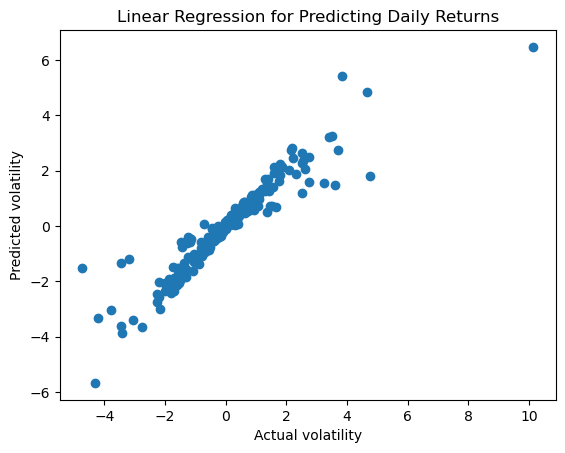

In [299]:
plt.scatter(y_test_model, y_pred)
plt.xlabel('Actual volatility')
plt.ylabel('Predicted volatility')
plt.title('Linear Regression for Predicting Daily Returns')
plt.show()

# Support Vector Regressor

In [300]:
from sklearn.svm import SVR

In [301]:
svr_reg = SVR()
svr_reg.fit(X_train_model, y_train_model)

SVR()

In [302]:
y_pred_svr = svr_reg.predict(X_test_model)

In [303]:
mse_svr = mean_squared_error(y_test_model, y_pred_svr)
r2_svr = r2_score(y_test_model, y_pred_svr)

print("\nSupport Vector Regressor:")
print(f"Mean Squared Error: {mse_svr:.2f}")
print(f"R-squared: {r2_svr:.2f}")


Support Vector Regressor:
Mean Squared Error: 3.00
R-squared: 0.04


In [304]:
models.append('SV Regressor')
mse.append(mse_svr)
r2.append(r2_svr)

# Random Forest Regression

In [305]:
from sklearn.ensemble import RandomForestRegressor

In [306]:
rf_reg = RandomForestRegressor(n_estimators=100)  
rf_reg.fit(X_train_model, y_train_model)

RandomForestRegressor()

In [307]:
y_pred_rf = rf_reg.predict(X_test_model)

In [308]:
mse_rf = mean_squared_error(y_test_model, y_pred_rf)
r2_rf = r2_score(y_test_model, y_pred_rf)

print("\nRandom Forest Regressor:")
print(f"Mean Squared Error: {mse_rf:.2f}")
print(f"R-squared: {r2_rf:.2f}")


Random Forest Regressor:
Mean Squared Error: 1.71
R-squared: 0.45


In [309]:
models.append('Random forest reg')
mse.append(mse_rf)
r2.append(r2_rf)

# final ensemble modelling(simple average value calculation)

In [310]:
predictions = pd.DataFrame({
    'Linear_Regression': y_pred,
    'Support_Vector_Regressor': y_pred_svr,
    'Random_Forest_Regressor': y_pred_rf
})

In [311]:
ensemble_pred = predictions.mean(axis=1)

In [312]:
ensemble_mse = mean_squared_error(y_test_model, ensemble_pred)

In [313]:
r2_ensemble = r2_score(y_test_model, ensemble_pred)

In [314]:
print("Ensemble Regression (Average):")
print(f"Mean Squared Error: {ensemble_mse:.2f}")

Ensemble Regression (Average):
Mean Squared Error: 1.16


In [315]:
models.append('ensemble_avg')
mse.append(ensemble_mse)
r2.append(r2_ensemble)

# final ensemble modelling(using stacking regressor)

In [316]:
import pandas as pd
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

In [317]:
final_regressor = LinearRegression()

In [318]:
stacking_reg = StackingRegressor(
    estimators=[('linear', model), ('svr', svr_reg), ('forest', rf_reg)],
    final_estimator=final_regressor
)

In [319]:
stacking_reg.fit(X_train_model, y_train_model)

StackingRegressor(estimators=[('linear', LinearRegression()), ('svr', SVR()),
                              ('forest', RandomForestRegressor())],
                  final_estimator=LinearRegression())

In [320]:
predictions = stacking_reg.predict(X_test_model)

In [321]:
mse_stack = mean_squared_error(y_test_model, predictions)
r2_stack = r2_score(y_test_model, predictions)
mae = mean_absolute_error(y_test_model,predictions)

print("Mean Squared Error (MSE):", mae)
print("R-squared:", r2)

Mean Squared Error (MSE): 0.3453785891889622
R-squared: [0.8766445171657822, 0.04147243168209258, 0.4533511721098483, 0.6304695919770957]


In [322]:
models.append('ensemble Stacking')
mse.append(mse_stack)
r2.append(r2_stack)

# analysing together

<AxesSubplot:>

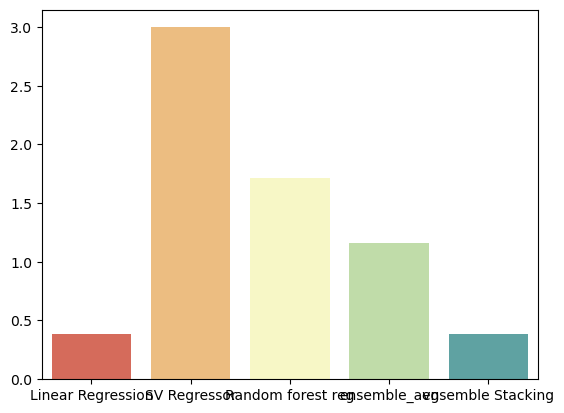

In [323]:
sns.barplot(x = models , y = mse ,palette ='Spectral')

<AxesSubplot:>

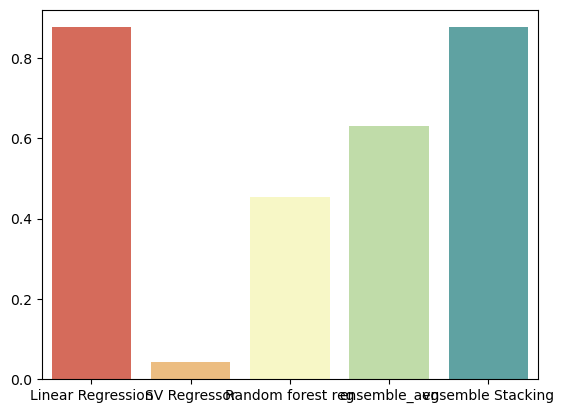

In [324]:
sns.barplot(x = models , y = r2 ,palette ='Spectral')

In [325]:
def model_perf(true, predicted):
  return np.mean((true - predicted) ** 2)

In [330]:
df.head()
#df.shape

,Open,High,Low,Close,Adj Close,Volume,Previous Close,Daily Return
Date,,,,,,,,
2020-04-20,194.00,197.350006,190.050003,192.500000,184.228027,81958510,193.250000,-0.388098
2020-04-21,188.00,188.199997,183.000000,184.750000,176.811050,53042420,192.500000,-4.025974
2020-04-22,185.50,189.500000,181.350006,188.699997,180.591324,61503413,184.750000,2.138023
2020-04-23,187.75,189.899994,185.149994,186.699997,178.677246,50955312,188.699997,-1.059883
2020-04-24,184.00,184.000000,179.000000,179.750000,172.025909,65137305,186.699997,-3.722548


In [334]:
df['key'] = 'SBI'
df

,Open,High,Low,Close,Adj Close,Volume,Previous Close,Daily Return,key
Date,,,,,,,,,
2020-04-20,194.000000,197.350006,190.050003,192.500000,184.228027,81958510,193.250000,-0.388098,SBI
2020-04-21,188.000000,188.199997,183.000000,184.750000,176.811050,53042420,192.500000,-4.025974,SBI
2020-04-22,185.500000,189.500000,181.350006,188.699997,180.591324,61503413,184.750000,2.138023,SBI
2020-04-23,187.750000,189.899994,185.149994,186.699997,178.677246,50955312,188.699997,-1.059883,SBI
2020-04-24,184.000000,184.000000,179.000000,179.750000,172.025909,65137305,186.699997,-3.722548,SBI
...,...,...,...,...,...,...,...,...,...
2024-04-09,768.450012,772.450012,761.099976,764.200012,764.200012,7465892,768.299988,-0.533643,SBI
2024-04-10,766.500000,780.700012,763.650024,779.049988,779.049988,14530669,764.200012,1.943205,SBI
2024-04-12,777.250000,779.500000,764.799988,766.299988,766.299988,14408722,779.049988,-1.636609,SBI


In [336]:
df.to_csv('sbi_key.csv')

In [326]:
import statsmodels.api as sm

In [327]:
'''import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Prepare data (replace this with your actual data)
# For demonstration purposes, I'll create some sample data
np.random.seed(0)
data = np.random.randn(100)
dates = pd.date_range(start='2022-01-01', periods=100)
df = pd.DataFrame({'Date': dates, 'Value': data})
df.set_index('Date', inplace=True)

# Split data into train and test sets
train_data = df.iloc[:80]
test_data = df.iloc[80:]

# Train ARIMA model
order = (5, 1, 0)  # Example order of ARIMA model
arima_model = ARIMA(train_data, order=order)
arima_result = arima_model.fit()

# Make predictions
forecast, _, _ = arima_result.forecast(steps=len(test_data))

# Evaluate predictions
mse = mean_squared_error(test_data, forecast)
rmse = np.sqrt(mse)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

# Visualize predictions
plt.figure(figsize=(10, 6))
plt.plot(train_data, label='Train Data')
plt.plot(test_data.index, forecast, label='ARIMA Forecast', color='red')
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


SyntaxError: EOF while scanning triple-quoted string literal (3655342982.py, line 41)

In [ ]:
def plot_bank_returns(bank, features, target, lr_pred, svr_pred, rf_pred, stacking_pred):
  bank_data = features[features[:, feature_index_for_bank] == bank]
  bank_target = target[features[:, feature_index_for_bank] == bank]

  plt.figure(figsize=(12, 6))
  plt.plot(bank_data[:, date_index], bank_target, label='Actual Return')  # Assuming a date feature
  plt.plot(bank_data[:, date_index], lr_pred[bank_data[:, feature_index_for_bank] == bank], label='Linear Regression')
  plt.plot(bank_data[:, date_index], svr_pred[bank_data[:, feature_index_for_bank] == bank], label='SVR')
  plt.plot(bank_data[:, date_index], rf_pred[bank_data[:, feature_index_for_bank] == bank], label='Random Forest')
  plt.plot(bank_data[:, date_index], stacking_pred[bank_data[:, feature_index_for_bank] == bank], label='Stacking')
  plt.xlabel('Date')
  plt.ylabel('Daily Return')
  plt.title(f'Daily Return Predictions for Bank {bank}')
  plt.legend()
  plt.grid(True)
  plt.show()